In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np


In [2]:
data=pd.read_csv('2023dataset.csv')

In [3]:
data

,datetime,DELHI,BRPL,BYPL,NDPL,NDMC,MES,temperature (degC),dewpoint_temperature (degC),relative_humidity (0-1),...,hour,day,month,year,dayofweek,holiday_sin_term_1,holiday_cos_term_1,holiday_sin_term_2,holiday_cos_term_2,is_weekend
0,01-01-2023 00:00,2377.87,1011.44,482.28,691.21,145.32,24.42,10.000000,8.235000,0.885000,...,0,1,1,2023,6,0.0,1.0,0.0,1.0,1
1,01-01-2023 00:00,2144.41,860.87,428.55,691.40,117.82,25.93,10.000000,8.235000,0.885000,...,0,1,1,2023,6,0.0,1.0,0.0,1.0,1
2,01-01-2023 00:05,2088.77,840.75,415.73,671.34,116.24,25.67,9.986667,8.230833,0.885833,...,0,1,1,2023,6,0.0,1.0,0.0,1.0,1
3,01-01-2023 00:05,2327.74,985.41,477.69,673.53,144.93,24.34,9.986667,8.230833,0.885833,...,0,1,1,2023,6,0.0,1.0,0.0,1.0,1
4,01-01-2023 00:10,2056.30,832.28,402.49,657.11,116.39,25.41,9.973333,8.226667,0.886667,...,0,1,1,2023,6,0.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104396,31-12-2023 22:10,2883.73,1250.23,574.75,869.07,137.04,29.90,10.913333,9.493333,0.906667,...,22,31,12,2023,6,0.0,1.0,0.0,1.0,1
104397,31-12-2023 22:15,2854.64,1223.89,575.66,860.57,138.07,29.34,10.872500,9.475000,0.907500,...,22,31,12,2023,6,0.0,1.0,0.0,1.0,1
104398,31-12-2023 22:20,2816.66,1205.60,568.34,847.68,138.93,29.24,10.831667,9.456667,0.908333,...,22,31,12,2023,6,0.0,1.0,0.0,1.0,1
104399,31-12-2023 22:25,2800.17,1186.12,568.10,856.06,134.54,28.75,10.790833,9.438333,0.909167,...,22,31,12,2023,6,0.0,1.0,0.0,1.0,1


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DELHI,104401.0,3930.623671,1242.689844,1302.080000,3108.880000,3812.790000,4847.150000,7409.940000
BRPL,104401.0,1659.451643,578.010238,470.730000,1283.580000,1588.620000,2061.560000,64333.160000
BYPL,104401.0,838.710593,345.770403,229.030000,651.300000,813.770000,1053.110000,63516.520000
NDPL,104401.0,1198.581262,524.999402,-124343.880000,965.600000,1192.140000,1450.360000,2300.640000
NDMC,104401.0,168.281533,63.198954,22.970000,122.470000,155.230000,197.260000,389.640000
MES,104401.0,27.165854,8.378601,0.000000,20.800000,26.450000,32.850000,54.670000
temperature (degC),104401.0,24.666434,7.899707,3.560000,19.073333,26.436667,30.420000,43.910000
dewpoint_temperature (degC),104401.0,17.218792,6.424027,-1.810000,12.622500,16.485000,23.476667,28.790000
relative_humidity (0-1),104401.0,0.673476,0.204860,0.140000,0.511667,0.706667,0.846667,1.000000
wind_speed (m/s),104401.0,2.334912,1.089958,0.030000,1.632500,2.175000,2.835000,8.300000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104401 entries, 0 to 104400
Data columns (total 30 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   datetime                                      104401 non-null  object 
 1   DELHI                                         104401 non-null  float64
 2   BRPL                                          104401 non-null  float64
 3   BYPL                                          104401 non-null  float64
 4   NDPL                                          104401 non-null  float64
 5   NDMC                                          104401 non-null  float64
 6   MES                                           104401 non-null  float64
 7   temperature (degC)                            104401 non-null  float64
 8   dewpoint_temperature (degC)                   104401 non-null  float64
 9   relative_humidity (0-1)                       10

In [6]:
data.columns

Index(['datetime', 'DELHI', 'BRPL', 'BYPL', 'NDPL', 'NDMC', 'MES',
       'temperature (degC)', 'dewpoint_temperature (degC)',
       'relative_humidity (0-1)', 'wind_speed (m/s)', 'wind_direction (deg)',
       'total_cloud_cover (0-1)',
       'total_precipitation (mm of water equivalent)', '1_hour_lag',
       '24_hour_lag', '168_hour_lag', 'rolling_mean_3_hour',
       'rolling_mean_24_hour', 'is_holiday', 'hour', 'day', 'month', 'year',
       'dayofweek', 'holiday_sin_term_1', 'holiday_cos_term_1',
       'holiday_sin_term_2', 'holiday_cos_term_2', 'is_weekend'],
      dtype='object')

In [7]:
data.drop(['BRPL', 'BYPL', 'NDPL', 'NDMC', 'MES'],axis=1,inplace=True)

In [8]:
print(data.isna().sum())  # For pandas DataFrame


datetime                                        0
DELHI                                           0
temperature (degC)                              0
dewpoint_temperature (degC)                     0
relative_humidity (0-1)                         0
wind_speed (m/s)                                0
wind_direction (deg)                            0
total_cloud_cover (0-1)                         0
total_precipitation (mm of water equivalent)    0
1_hour_lag                                      0
24_hour_lag                                     0
168_hour_lag                                    0
rolling_mean_3_hour                             0
rolling_mean_24_hour                            0
is_holiday                                      0
hour                                            0
day                                             0
month                                           0
year                                            0
dayofweek                                       0


In [9]:
# Convert datetime to pandas datetime and set it as the index
data['datetime'] = pd.to_datetime(data['datetime'],dayfirst=True)
data.set_index('datetime', inplace=True)

In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Separate features and target
target = data['DELHI']
features = data.drop(columns=['DELHI'])  # Drop the target from features

# Scale the data
feature_scaler = MinMaxScaler()
scaled_features = feature_scaler.fit_transform(features)

# Scale the target separately (optional, useful for inverse transformation later)
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, target, sequence_length=288):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i + sequence_length, :])
        y.append(target[i + sequence_length])
    return np.array(x), np.array(y)

# Create sequences with a window size of 24 hours
sequence_length = 288
X, y = create_sequences(scaled_features, scaled_target, sequence_length)

# Split into training and testing sets (80%-20%)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (83290, 288, 23), y_train shape: (83290, 1)
X_test shape: (20823, 288, 23), y_test shape: (20823, 1)


In [11]:
X_train[0].shape

(288, 23)

In [12]:
import pickle
with open('feature_scaler.pkl', 'wb') as f:
    pickle.dump(feature_scaler, f)
with open('target_scaler.pkl', 'wb') as f:
    pickle.dump(target_scaler, f)



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(sequence_length, X_train.shape[2])),
    Dropout(0.2),

    Dense(8),
    Dense(1)  # Output layer for the target variable
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=40,
    batch_size=32,
    verbose=1
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

NameError: name 'history' is not defined

In [33]:
import pickle
model=pickle.load(open('40model.pkl','rb'))

651/651 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 9.4639e-05 - mae: 0.0073
Test Loss: 0.0001341445167781785, Test MAE: 0.008421375416219234
651/651 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step


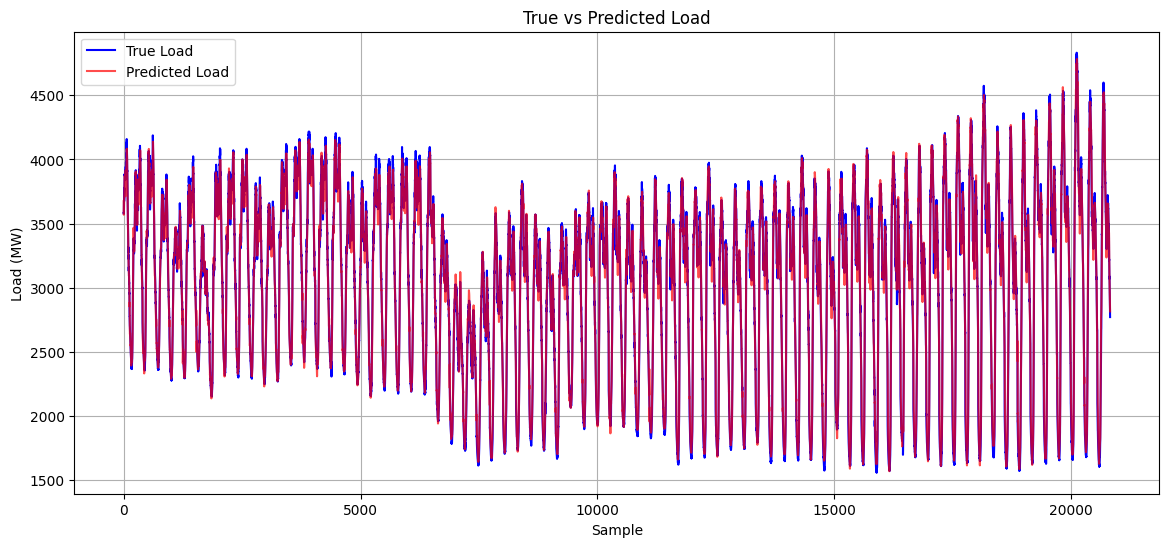

In [34]:
# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Make predictions
y_pred = model.predict(X_test)

# Rescale predictions and true values back to the original scale
y_test_rescaled = target_scaler.inverse_transform(y_test)
y_pred_rescaled = target_scaler.inverse_transform(y_pred)

# Plot true vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='True Load', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Load', color='red', alpha=0.7)
plt.title('True vs Predicted Load')
plt.xlabel('Sample')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


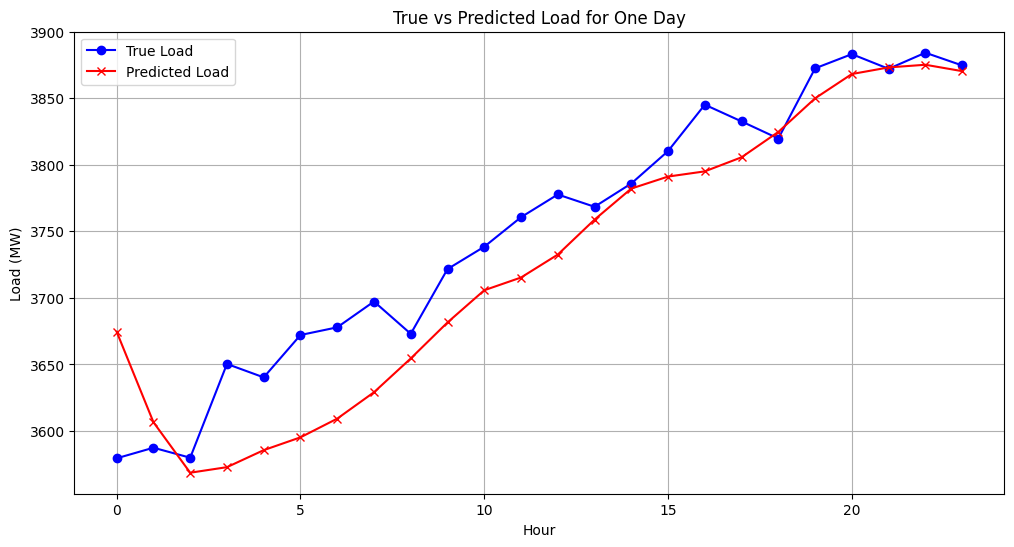

In [35]:
import numpy as np

# Select the first day from the test set (24 samples)
day_index = 0  # Change this to test different days
X_test_day = X_test[day_index:day_index + 24]
y_test_day = y_test[day_index:day_index + 24]

# Predict for this day
y_pred_day = model.predict(X_test_day)

# Rescale back to the original scale
y_test_day_rescaled = target_scaler.inverse_transform(y_test_day)
y_pred_day_rescaled = target_scaler.inverse_transform(y_pred_day)

# Visualize true vs predicted for the day
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_day_rescaled, label='True Load', color='blue', marker='o')
plt.plot(y_pred_day_rescaled, label='Predicted Load', color='red', marker='x')
plt.title('True vs Predicted Load for One Day')
plt.xlabel('Hour')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid()
plt.show()


651/651 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step


<ipython-input-36-cc46f04c881e>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  results[['true_load', 'predicted_load']].resample('M').mean().plot()


<Figure size 1400x600 with 0 Axes>

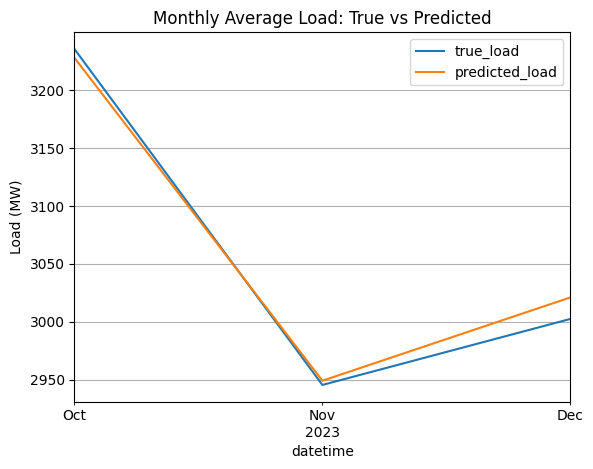

<Figure size 1400x600 with 0 Axes>

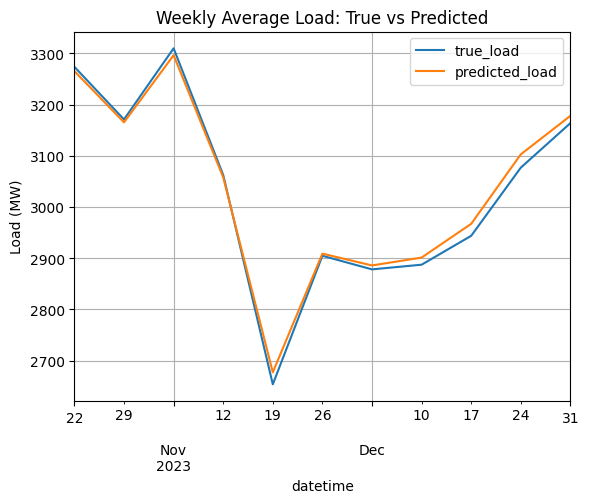

<Figure size 1400x600 with 0 Axes>

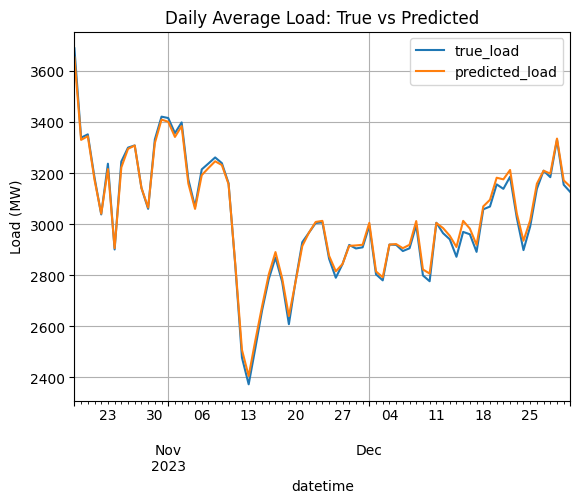

In [36]:
# Predict for the entire test set
y_pred_full = model.predict(X_test)

# Rescale predictions and actual values
y_test_rescaled_full = target_scaler.inverse_transform(y_test)
y_pred_rescaled_full = target_scaler.inverse_transform(y_pred_full)

# Convert to pandas DataFrame for easier manipulation
test_dates = data.index[-len(y_test_rescaled_full):]  # Extract corresponding dates
results = pd.DataFrame({
    'datetime': test_dates,
    'true_load': y_test_rescaled_full.flatten(),
    'predicted_load': y_pred_rescaled_full.flatten()
})
results.set_index('datetime', inplace=True)


# Monthly visualization
plt.figure(figsize=(14, 6))
results[['true_load', 'predicted_load']].resample('M').mean().plot()
plt.title('Monthly Average Load: True vs Predicted')
plt.ylabel('Load (MW)')
plt.grid()
plt.show()

# Weekly visualization
plt.figure(figsize=(14, 6))
results[['true_load', 'predicted_load']].resample('W').mean().plot()
plt.title('Weekly Average Load: True vs Predicted')
plt.ylabel('Load (MW)')
plt.grid()
plt.show()

# Daily visualization
plt.figure(figsize=(14, 6))
results[['true_load', 'predicted_load']].resample('D').mean().plot()
plt.title('Daily Average Load: True vs Predicted')
plt.ylabel('Load (MW)')
plt.grid()
plt.show()

In [37]:
def get_predictions_and_plot_actual_vs_predicted(
    start_date, end_date, mydata, scaler, target_scaler, model, sequence_length=288
):
    """
    Generate hourly predictions for the specified date range and compare with actual values.
    """
    # Ensure the datetime column is the index
    if not isinstance(mydata.index, pd.DatetimeIndex):
        raise ValueError("The data must have a datetime index.")

    # Filter data for the specified date range
    filtered_data = mydata.loc[start_date:end_date]

    # Ensure sufficient data
    if len(filtered_data) < sequence_length:
        raise ValueError(f"Insufficient data for the specified range. Minimum {sequence_length} records needed.")

    # Ensure filtered data matches scaler's expected features
    if not set(scaler.feature_names_in_).issubset(filtered_data.columns):
        raise ValueError("The data contains unexpected features not seen during training.")

    filtered_data = filtered_data[scaler.feature_names_in_]

    # Scale the data
    scaled_filtered_data = scaler.transform(filtered_data)

    # Create sequences for prediction
    X_filtered, _ = create_sequences(
        scaled_filtered_data, scaled_filtered_data[:, 0], sequence_length
    )

    # Ensure the input shape matches the model
    X_filtered = X_filtered.reshape((X_filtered.shape[0], X_filtered.shape[1], -1))

    # Predict
    predictions_scaled = model.predict(X_filtered)

    # Rescale predictions to the original scale
    predictions = target_scaler.inverse_transform(predictions_scaled)

    # Prepare results
    prediction_dates = filtered_data.index[sequence_length:]
    predicted_df = pd.DataFrame({
        'datetime': prediction_dates,
        'predicted_load': predictions.flatten()
    }).set_index('datetime')

    # Compare predictions with actual values
    actual_values = filtered_data.iloc[sequence_length:][filtered_data.columns[0]]

    # Ensure alignment between predicted and actual values
    predicted_df = predicted_df.loc[actual_values.index]

    return predicted_df


3262/3262 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step


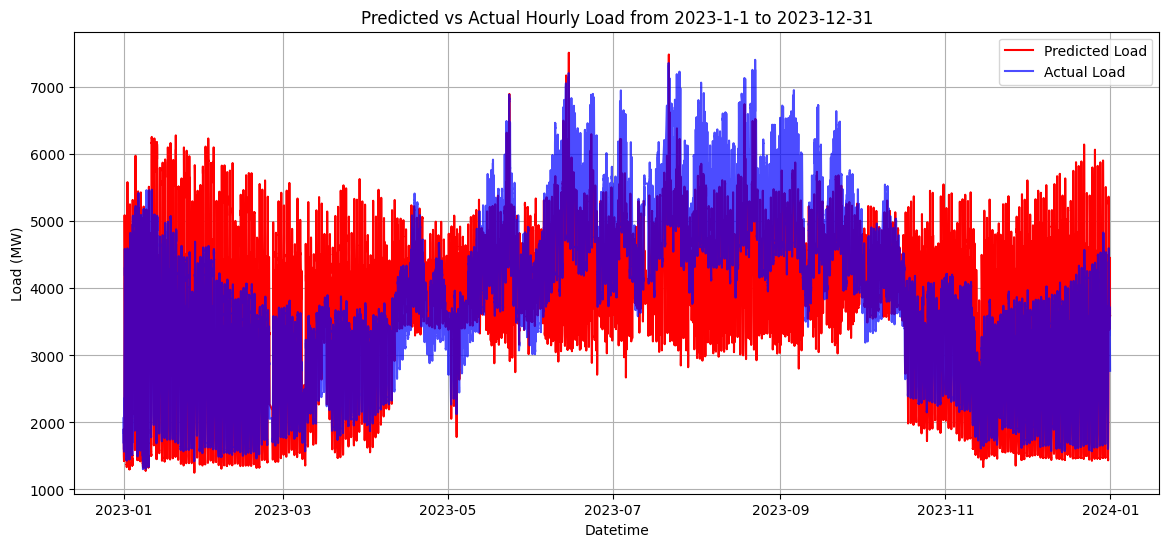

In [39]:
# Example: Predic hourly load between two dates
start_date = '2023-1-1'
end_date = '2023-12-31'

try:
    # Call the function to get predictions
    hourly_predictions = get_predictions_and_plot_actual_vs_predicted(
        start_date=start_date,
        end_date=end_date,
        mydata=data,  # Replace with your DataFrame
        scaler=feature_scaler,  # Replace with your scaler
        target_scaler=target_scaler,  # Replace with your target scaler
        model=model,  # Replace with your trained model
        sequence_length=24,  # Adjust based on your training setup
    )

    # Extract actual values for the same date range, excluding the first 'sequence_length' rows
    actual_values = data.loc[start_date:end_date]['DELHI']  # Replace 'DELHI' with your target column name
    actual_values = actual_values.iloc[24:]  # Align actual values with predictions after the sequence offset

    # Plot both actual and predicted values
    plt.figure(figsize=(14, 6))
    plt.plot(hourly_predictions.index, hourly_predictions['predicted_load'], label='Predicted Load', color='red')
    plt.plot(actual_values.index, actual_values, label='Actual Load', color='blue', alpha=0.7)
    plt.title(f'Predicted vs Actual Hourly Load from {start_date} to {end_date}')
    plt.xlabel('Datetime')
    plt.ylabel('Load (MW)')
    plt.legend()
    plt.grid()
    plt.show()

except ValueError as e:
    print(f"Error: {e}")


In [40]:
print(len(test_dates))  # Length of date array
print(len(y_test_rescaled_full))  # Length of rescaled predictions or actual values


20823
20823


In [ ]:
# Predict for the entire test set
y_pred_full = model.predict(X)

# Rescale predictions and actual values
y_test_rescaled_full = target_scaler.inverse_transform(y)
y_pred_rescaled_full = target_scaler.inverse_transform(y_pred_full)

# Convert to pandas DataFrame for easier manipulation
test_dates = data.index[-len(y_test_rescaled_full):]  # Extract corresponding dates
results = pd.DataFrame({
    'datetime': test_dates,
    'true_load': y_test_rescaled_full.flatten(),
    'predicted_load': y_pred_rescaled_full.flatten()
})
results.set_index('datetime', inplace=True)


# Monthly visualization
plt.figure(figsize=(14, 6))
results[['true_load', 'predicted_load']].resample('M').mean().plot()
plt.title('Monthly Average Load: True vs Predicted')
plt.ylabel('Load (MW)')
plt.grid()
plt.show()

# Weekly visualization
plt.figure(figsize=(14, 6))
results[['true_load', 'predicted_load']].resample('W').mean().plot()
plt.title('Weekly Average Load: True vs Predicted')
plt.ylabel('Load (MW)')
plt.grid()
plt.show()

# Daily visualization
plt.figure(figsize=(14, 6))
results[['true_load', 'predicted_load']].resample('D').mean().plot()
plt.title('Daily Average Load: True vs Predicted')
plt.ylabel('Load (MW)')
plt.grid()
plt.show()

In [ ]:
pickle.dump(model,open('best_model.pkl','wb'))

In [8]:
testing_data=pd.read_csv('final_testing_data.csv')

In [9]:
testing_data

,DELHI,BRPL,BYPL,NDPL,NDMC,MES,datetime,temperature (degC),dewpoint_temperature (degC),relative_humidity (0-1),...,hour,day,month,year,dayofweek,holiday_sin_term_1,holiday_cos_term_1,holiday_sin_term_2,holiday_cos_term_2,is_weekend
0,2335.50,992.57,426.83,725.61,143.74,24.60,2024-01-03 00:00:00,8.825000,7.675000,0.925000,...,0,3,1,2024,2,0.0,1.0,0.0,1.0,0
1,2288.39,972.19,415.67,710.71,143.17,24.42,2024-01-03 00:05:00,8.809167,7.655833,0.924167,...,0,3,1,2024,2,0.0,1.0,0.0,1.0,0
2,2258.62,960.51,403.78,706.86,141.95,24.10,2024-01-03 00:10:00,8.793333,7.636667,0.923333,...,0,3,1,2024,2,0.0,1.0,0.0,1.0,0
3,2214.56,938.22,393.49,695.85,142.25,23.75,2024-01-03 00:15:00,8.777500,7.617500,0.922500,...,0,3,1,2024,2,0.0,1.0,0.0,1.0,0
4,2178.84,924.05,386.93,684.76,141.94,23.40,2024-01-03 00:20:00,8.761667,7.598333,0.921667,...,0,3,1,2024,2,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84034,3472.16,1607.62,787.97,922.01,113.72,15.28,2024-10-31 23:25:00,23.189167,17.565000,0.710833,...,23,31,10,2024,3,0.0,1.0,0.0,1.0,0
84035,3450.92,1607.62,786.34,919.35,113.72,15.27,2024-10-31 23:30:00,23.180000,17.530000,0.710000,...,23,31,10,2024,3,0.0,1.0,0.0,1.0,0
84036,3452.75,1607.62,782.88,912.49,113.72,15.27,2024-10-31 23:35:00,23.147500,17.504167,0.710000,...,23,31,10,2024,3,0.0,1.0,0.0,1.0,0
84037,3448.96,1607.62,777.88,909.88,113.72,15.27,2024-10-31 23:40:00,23.115000,17.478333,0.710000,...,23,31,10,2024,3,0.0,1.0,0.0,1.0,0


In [10]:
testing_data['datetime']=pd.to_datetime(testing_data['datetime'])


In [11]:
testing_data.drop(['BRPL', 'BYPL', 'NDPL', 'NDMC', 'MES'],axis=1,inplace=True)

In [12]:
testing_data.set_index('datetime',inplace=True)

In [13]:
import pickle as pkl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [17]:
test_model=pkl.load(open('40model.pkl','rb'))
feature_scaler=pkl.load(open('40fs.pkl','rb'))
target_scaler=pkl.load(open('40ts.pkl','rb'))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [18]:
def get_predictions_and_plot_actual_vs_predicted(
    start_date, end_date, mydata, scaler, target_scaler, model, sequence_length=24
):
    """
    Generate hourly predictions for the specified date range and compare with actual values.
    """
    # Ensure the datetime column is the index
    if not isinstance(mydata.index, pd.DatetimeIndex):
        raise ValueError("The data must have a datetime index.")

    # Filter data for the specified date range
    filtered_data = mydata.loc[start_date:end_date]

    # Ensure sufficient data
    #if len(filtered_data) < sequence_length:
     #   raise ValueError(f"Insufficient data for the specified range. Minimum {sequence_length} records needed.")

    # Ensure filtered data matches scaler's expected features
    if not set(scaler.feature_names_in_).issubset(filtered_data.columns):
        raise ValueError("The data contains unexpected features not seen during training.")

    filtered_data = filtered_data[scaler.feature_names_in_]

    # Scale the data
    scaled_filtered_data = scaler.transform(filtered_data)

    # Create sequences for prediction
    X_filtered, _ = create_sequences(
        scaled_filtered_data, scaled_filtered_data[:, 0], sequence_length
    )

    # Ensure the input shape matches the model
    X_filtered = X_filtered.reshape((X_filtered.shape[0], X_filtered.shape[1], -1))

    # Predict
    predictions_scaled = model.predict(X_filtered)

    # Rescale predictions to the original scale
    predictions = target_scaler.inverse_transform(predictions_scaled)

    # Prepare results
    prediction_dates = filtered_data.index[sequence_length:]
    predicted_df = pd.DataFrame({
        'datetime': prediction_dates,
        'predicted_load': predictions.flatten()
    }).set_index('datetime')

    # Compare predictions with actual values
    actual_values = filtered_data.iloc[sequence_length:][filtered_data.columns[0]]

    # Ensure alignment between predicted and actual values
    predicted_df = predicted_df.loc[actual_values.index]

    return predicted_df


In [19]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Example start and end dates
start_date = '2024-1-1'
end_date = '2024-2-1'

try:
    # Call the function to get predictions
    hourly_predictions = get_predictions_and_plot_actual_vs_predicted(
        start_date=start_date,
        end_date=end_date,
        mydata=testing_data,  # Replace with your DataFrame
        scaler=feature_scaler,  # Replace with your scaler
        target_scaler=target_scaler,  # Replace with your target scaler
        model=test_model,  # Replace with your trained model
        sequence_length=24,  # Adjust based on your training setup
    )

    # Extract actual values for the same date range, excluding the first 'sequence_length' rows
    actual_values = testing_data.loc[start_date:end_date]['DELHI']  # Replace 'DELHI' with your target column name
    actual_values = actual_values.iloc[24:]  # Align actual values with predictions after the sequence offset

    # Calculate error metrics
    mae = mean_absolute_error(actual_values, hourly_predictions['predicted_load'])
    mse = mean_squared_error(actual_values, hourly_predictions['predicted_load'])
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual_values - hourly_predictions['predicted_load']) / actual_values)) * 100  # Percentage error

    # Print the error metrics
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

    # Plot both actual and predicted values
    plt.figure(figsize=(20, 6))
    plt.plot(hourly_predictions.index, hourly_predictions['predicted_load'], label='Predicted Load', color='red')
    plt.plot(actual_values.index, actual_values, label='Actual Load', color='blue', alpha=0.7)
    plt.title(f'Predicted vs Actual Hourly Load from {start_date} to {end_date}')
    plt.xlabel('Datetime')
    plt.ylabel('Load (MW)')
    plt.legend()
    plt.grid()
    plt.show()

    # Prepare the results as a dictionary for JSON
    results = {
        "predictions": {str(key): value for key, value in hourly_predictions['predicted_load'].items()},
        "actual_values": {str(key): value for key, value in actual_values.items()},
        "error_metrics": {
            "mae": mae,
            "mse": mse,
            "rmse": rmse,
            "mape": mape
        },
        "metadata": {
            "start_date": start_date,
            "end_date": end_date,
            "sequence_length": 24,
            "model": "test_model",  # Replace with actual model identifier
            "dataset": "2024 testing set"
        }
    }

    # Write the results to a JSON file
    with open("load_predictions.json", "w") as json_file:
        json.dump(results, json_file, indent=4)

    print("Results have been saved to 'load_predictions.json'.")

except ValueError as e:
    print(f"Error: {e}")


NameError: name 'create_sequences' is not defined

In [37]:
results


,true_load,predicted_load
datetime,,
2022-01-03 01:40:00,1547.45,2911.816650
2022-01-03 01:45:00,1541.59,2511.261719
2022-01-03 01:50:00,1540.71,2312.669922
2022-01-03 01:55:00,1529.68,2319.739014
2022-01-03 02:00:00,1525.86,2375.266113
...,...,...
2022-07-31 10:10:00,4096.73,4679.295410
2022-07-31 10:15:00,4161.97,4691.519043
2022-07-31 10:20:00,4154.71,4705.928223


In [ ]:
import numpy as np
import pandas as pd

feature_scaler = pkl.load(open('drive/MyDrive/LSTM model/current_trained/feature_scaler.pkl', 'rb'))

def create_input_sequences(mydata, scaler, sequence_length=24):
    """
    Create input sequences for a model from scaled data.

    Parameters:
    - mydata (pd.DataFrame): The input data containing features and datetime index.
    - scaler (sklearn.preprocessing object): The scaler used to normalize the data.
    - sequence_length (int): The length of each input sequence.

    Returns:
    - X_sequences (np.ndarray): The array of input sequences for the model.
    """
    # Ensure the datetime column is the index
    if not isinstance(mydata.index, pd.DatetimeIndex):
        raise ValueError("The data must have a datetime index.")

    # Ensure filtered data matches scaler's expected features
    if not set(scaler.feature_names_in_).issubset(mydata.columns):
        raise ValueError("The data contains unexpected features not seen during training.")

    mydata = mydata[scaler.feature_names_in_]

    # Scale the data
    scaled_data = scaler.transform(mydata)

    # Create sequences
    X_sequences = []

    for i in range(len(scaled_data) - sequence_length + 1):
        X_sequences.append(scaled_data[i:i + sequence_length])

    # Convert to NumPy array
    X_sequences = np.array(X_sequences)

    return X_sequences


In [ ]:
input= create_input_sequences(testing_data,feature_scaler,24)

In [ ]:
test_model.predict(input)

745/745 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.0132905 ],
       [0.02749263],
       [0.04485992],
       ...,
       [0.23358342],
       [0.20663771],
       [0.1863668 ]], dtype=float32)